In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data 
import csv
df = pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\load_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
gdp = pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\gdp_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
pop = pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\population_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
tmp =  pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\tmp_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])



In [3]:
#join all information
joined = df.join(gdp, on='DateTime', how='left', lsuffix = '', rsuffix = '_GDP', sort=False)
joined = joined.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.join(tmp, on='DateTime', how='left', lsuffix = '', rsuffix = '_TMP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too



In [4]:
#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL', 'DE']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country + '_GDP', country+ '_POP', country+'_TMP']]
    country_datasets.append([country, country_dataset])

for each in country_datasets: 
    name = each[0]
    dataset = each[1]
    

In [5]:
nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works

x_train, x_test, y_train, y_test = train_test_split(nonan.iloc[:, :1].values, nonan['DE'].values,test_size=0.2)



Coefficients: 
 [1.]
Mean squared error: 0.00
Coefficient of determination: 1.00


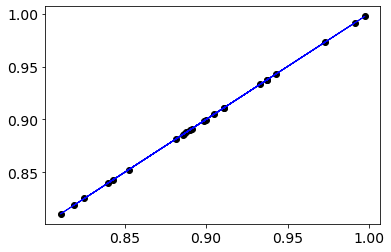

In [7]:
# logistic regression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(x_train,y_train)

#Making a predictions using test set 
y_pred = reg.predict(x_test)

#The coefficients 
print("Coefficients: \n", reg.coef_)
#The mean squared error 
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
#the coefficient of determination : 1 is perfect prediction 
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#plot outputs 
plt.scatter(x_test, y_test, color ="black")
plt.plot(x_test, y_pred, color ="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('')
plt.xlabel('')

plt.show()



In [8]:
#join all information
joined = df.join(gdp, on='DateTime', how='left', lsuffix = '', rsuffix = '_GDP', sort=False)
joined = joined.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.join(tmp, on='DateTime', how='left', lsuffix = '', rsuffix = '_TMP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too

In [9]:
#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country + '_GDP', country+ '_POP']]
    country_datasets.append([country, country_dataset])
    
    
for each in country_datasets: 
    name = each[1]
    dataset = each[1]

In [10]:
nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works

PL_x_train, PL_x_test, PL_y_train, PL_y_test = train_test_split(nonan.iloc[:, :1].values, nonan['PL'].values,test_size=0.2)



Poland: GDP, Population & Temperature Coefficients: 
 [1.]
Poland: GDP, Population & Temperature Mean squared error: 0.00
Poland: GDP, Population & Temperature Coefficient of determination: 1.00


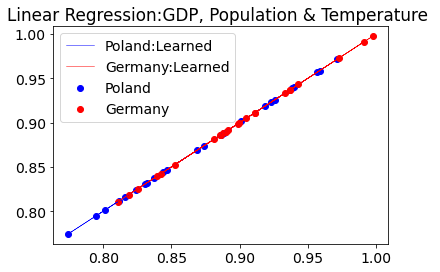

In [12]:

#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(PL_x_train,PL_y_train)

#Making a predictions using test set 
PL_y_pred = reg.predict(PL_x_test)

#The coefficients 
print("Poland: GDP, Population & Temperature Coefficients: \n", reg.coef_)
#The mean squared error 
print("Poland: GDP, Population & Temperature Mean squared error: %.2f"% mean_squared_error(PL_y_test, PL_y_pred))
#the coefficient of determination : 1 is perfect prediction 
print("Poland: GDP, Population & Temperature Coefficient of determination: %.2f" % r2_score(PL_y_test, PL_y_pred))

#plot outputs 
plt.scatter(PL_x_test, PL_y_test, color ="blue",label ='Poland')
plt.plot(PL_x_test,PL_y_pred, color ="blue", linewidth=0.5, label='Poland:Learned')

plt.scatter(x_test, y_test, color ="red", label ='Germany')
plt.plot(x_test, y_pred, color ="red", linewidth=0.5, label='Germany:Learned')

#plt.xticks(())
#plt.yticks(())

# displaying the title
plt.title("Linear Regression:GDP, Population & Temperature ")
plt.legend()

plt.show()

Coefficients: 
 [1.]
Mean squared error: 0.00
Coefficient of determination: 1.00


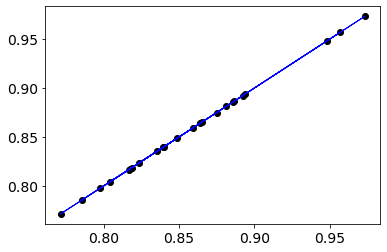

In [13]:
# plot 2 without GDP data 

#join all information 
joined = df.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.join(tmp, on='DateTime', how='left', lsuffix = '', rsuffix = '_TMP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too

#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL', 'DE']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country+ '_POP', country+'_TMP']]
    country_datasets.append([country, country_dataset])

for each in country_datasets: 
    name = each[0]
    dataset = each[1]
 

nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works

x_train_PT, x_test_PT, y_train_PT, y_test_PT = train_test_split(nonan.iloc[:, :1].values, nonan['DE'].values,test_size=0.2)



#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(x_train_PT,y_train_PT)

#Making a predictions using test set 
y_pred_PT = reg.predict(x_test_PT)

#The coefficients 
print("Coefficients: \n", reg.coef_)
#The mean squared error 
print("Mean squared error: %.2f"% mean_squared_error(y_test_PT, y_pred_PT))
#the coefficient of determination : 1 is perfect prediction 
print("Coefficient of determination: %.2f" % r2_score(y_test_PT, y_pred_PT))

#plot outputs 
plt.scatter(x_test_PT, y_test_PT, color ="black")
plt.plot(x_test_PT, y_pred_PT, color ="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('')
plt.xlabel('')

plt.show()

In [14]:
#join all information
joined = df.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.join(tmp, on='DateTime', how='left', lsuffix = '', rsuffix = '_TMP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too

In [15]:
#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country+ '_POP', country+'_TMP']]
    country_datasets.append([country, country_dataset])
    
    
for each in country_datasets: 
    name = each[1]
    dataset = each[1]

In [16]:
nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works

PL_x_train_PT, PL_x_test_PT, PL_y_train_PT, PL_y_test_PT = train_test_split(nonan.iloc[:, :1].values, nonan['PL'].values,test_size=0.2)



Poland: GDP, Population & Temperature Coefficients: 
 [1.]
Poland: GDP, Population & Temperature Mean squared error: 0.00
Poland: GDP, Population & Temperature Coefficient of determination: 1.00


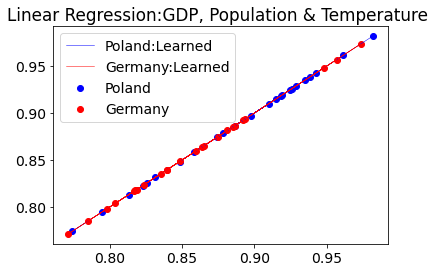

In [17]:
#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(PL_x_train_PT,PL_y_train_PT)

#Making a predictions using test set 
PL_y_pred_PT = reg.predict(PL_x_test_PT)

#The coefficients 
print("Poland: GDP, Population & Temperature Coefficients: \n", reg.coef_)
#The mean squared error 
print("Poland: GDP, Population & Temperature Mean squared error: %.2f"% mean_squared_error(PL_y_test_PT, PL_y_pred_PT))
#the coefficient of determination : 1 is perfect prediction 
print("Poland: GDP, Population & Temperature Coefficient of determination: %.2f" % r2_score(PL_y_test_PT, PL_y_pred_PT))

#plot outputs 
plt.scatter(PL_x_test_PT, PL_y_test_PT, color ="blue",label ='Poland')
plt.plot(PL_x_test_PT,PL_y_pred_PT, color ="blue", linewidth=0.5, label='Poland:Learned')

plt.scatter(x_test_PT, y_test_PT, color ="red", label ='Germany')
plt.plot(x_test_PT, y_pred_PT, color ="red", linewidth=0.5, label='Germany:Learned')

#plt.xticks(())
#plt.yticks(())

# displaying the title
plt.title("Linear Regression:GDP, Population & Temperature ")
plt.legend()

plt.show()

Coefficients: 
 [1.]
Mean squared error: 0.00
Coefficient of determination: 1.00


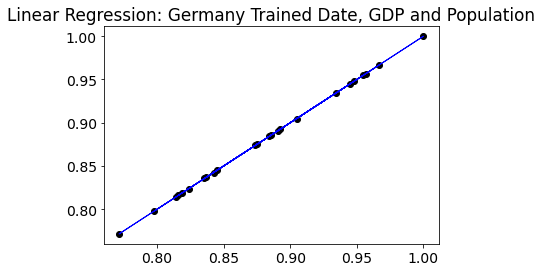

In [18]:
# plot 2 with temperature data 

joined = df.join(gdp, on='DateTime', how='left', lsuffix = '', rsuffix = '_GDP', sort=False)
joined = joined.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too

#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL', 'DE']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country + '_GDP', country+ '_POP']]
    country_datasets.append([country, country_dataset])

for each in country_datasets: 
    name = each[0]
    dataset = each[1]
 

nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works

DE_x_train_GDP, DE_x_test_GDP, DE_y_train_GDP, DE_y_test_GDP = train_test_split(nonan.iloc[:, :1].values, nonan['DE'].values,test_size=0.2)



#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(DE_x_train_GDP,DE_y_train_GDP)

#Making a predictions using test set 
DE_GDP_y_pred = reg.predict(DE_x_test_GDP)

#The coefficients 
print("Coefficients: \n", reg.coef_)
#The mean squared error 
print("Mean squared error: %.2f"% mean_squared_error(DE_y_test_GDP, DE_GDP_y_pred))
#the coefficient of determination : 1 is perfect prediction 
print("Coefficient of determination: %.2f" % r2_score(DE_y_test_GDP, DE_GDP_y_pred))

#plot outputs 
plt.scatter(DE_x_test_GDP, DE_y_test_GDP, color ="black")
plt.plot(DE_x_test_GDP, DE_GDP_y_pred, color ="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.title("Linear Regression: Germany Trained Date, GDP and Population")

plt.show()

In [19]:
##### used PL to train
joined = df.join(gdp, on='DateTime', how='left', lsuffix = '', rsuffix = '_GDP', sort=False)
joined = joined.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too



In [20]:
#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country + '_GDP', country+ '_POP']]
    country_datasets.append([country, country_dataset])



In [21]:
for each in country_datasets: 
    name = each[1]
    dataset = each[1]

In [22]:
nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works


x_train_GDP, x_test_GDP, y_train_GDP, y_test_GDP = train_test_split(nonan.iloc[:, :1].values, nonan['PL'].values,test_size=0.2)



Poland: GDP & Population Coefficients: 
 [1.]
Poland: GDP & Population Mean squared error: 0.01
Poland: GDP & Population Coefficient of determination: -1.48


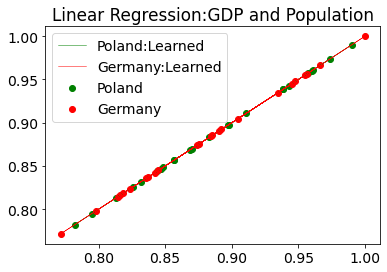

In [23]:

#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(x_train_GDP,y_train_GDP)

#Making a predictions using test set 
GDP_y_pred = reg.predict(x_test_GDP)

#The coefficients 
print("Poland: GDP & Population Coefficients: \n", reg.coef_)
#The mean squared error 
print("Poland: GDP & Population Mean squared error: %.2f"% mean_squared_error(y_test, GDP_y_pred))
#the coefficient of determination : 1 is perfect prediction 
print("Poland: GDP & Population Coefficient of determination: %.2f" % r2_score(y_test, GDP_y_pred))

#plot outputs 
plt.scatter(x_test_GDP, y_test_GDP, color ="green",label ='Poland')
plt.plot(x_test_GDP, GDP_y_pred, color ="green", linewidth=0.5, label='Poland:Learned')

plt.scatter(DE_x_test_GDP, DE_y_test_GDP, color ="red", label ='Germany')
plt.plot(DE_x_test_GDP, DE_GDP_y_pred, color ="red", linewidth=0.5, label='Germany:Learned')

#plt.xticks(())
#plt.yticks(())

# displaying the title
plt.title("Linear Regression:GDP and Population")
plt.legend()

plt.show()